In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Question: 1

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


In [2]:
airline= pd.read_csv('EastWestAirlines.csv')
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
features=airline.iloc[:,:11]

## K Mean Clustering

### Scale the data

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sd_scaler = StandardScaler()

In [7]:
scaled_data = sd_scaler.fit_transform(features)
scaled_data

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

### Build the model

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmodel = KMeans(n_clusters=4, random_state=42)

In [10]:
kmodel.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [11]:
kmodel.labels_

array([0, 0, 0, ..., 1, 1, 1])

### Hyperparameter Tuninng

In [12]:
wcss = []
for i in range(1,10):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(features)
    wcss.append(model.inertia_)
wcss

[42967206846488.195,
 20828852093354.984,
 11797435957432.715,
 7554603309402.893,
 5729598331520.734,
 4546507927887.455,
 3702589068307.713,
 3277286059478.6113,
 2902498318724.2227]

### Elbow Plot

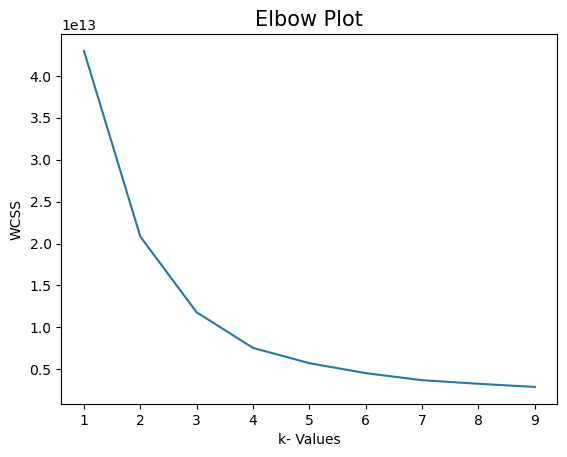

In [13]:
plt.plot(range(1,10), wcss)
plt.title('Elbow Plot', fontsize=15)
plt.xlabel('k- Values')
plt.ylabel('WCSS')
plt.show()

Here k=4 is the best value.

In [14]:
final_model = KMeans(n_clusters=4, random_state=42)

In [15]:
final_model.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [16]:
final_model.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
airline['Label']= final_model.labels_
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Label
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [18]:
grp = airline.groupby('Label')

In [19]:
for x,y in grp:
    print(y)
    print(60*'_')

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
5        6    16420           0          1          1          1            0   
...    ...      ...         ...        ...        ...        ...          ...   
2168  2185   245045           0          1          1          1        25039   
2176  2193   194875           0          1          1          1         7550   
2184  2201   109268           0          2          1          1         7401   
2200  2217    12271         500          2          1          1         7684   
2214  2232   292023           0          1          1          1        14125   

      Bonus_trans  Flight_m

In [20]:
grp.agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Label,,,,,,,,,,,,
0,1083.192251,58119.372807,107.143275,1.440058,1.017544,1.000731,6604.221491,8.419591,242.698099,0.732456,5738.323099,0.305556
1,3117.801129,40196.215809,109.916562,1.432873,1.016311,1.000000,6763.560226,8.123588,203.831870,0.610414,2181.543287,0.246550
2,1763.630872,192924.000000,823.993289,2.221477,1.040268,1.000000,33066.302013,28.228188,5644.080537,16.530201,4664.040268,0.798658
3,1512.274775,137394.102477,148.378378,4.111486,1.002252,1.054054,49346.476351,19.958333,384.995495,1.188063,5008.751126,0.620495


## Hierarchical Agglomerative Clustering

### Scale the data

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
mn_scaler = MinMaxScaler()
scaled_mn = mn_scaler.fit_transform(features)

In [23]:
scaled_mn

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.43742464e-01],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.39884254e-01],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.47841813e-01],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.68796721e-01],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.62248110e-02, 1.88679245e-02, 1.68676151e-01],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.68314444e-01]])

### Build the model

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
hac_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

In [26]:
hac_model.fit(scaled_mn)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [27]:
hac_model.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [28]:
airline['HAC_Labels'] = hac_model.labels_

In [29]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Label,HAC_Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,2


In [30]:
airline.drop('Label', axis =1, inplace=True)

In [31]:
hac_grp = airline.groupby('HAC_Labels')

In [32]:
for x,y in hac_grp:
    print(y)
    print(65*'_')

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
11      12    96522           0          5          1          1        61105   
20      21   120576           0          5          1          1        58831   
79      82    38896           0          5          1          1        76988   
85      88    35418           0          5          1          1        58557   
94      97   185549           0          5          1          1       110859   
...    ...      ...         ...        ...        ...        ...          ...   
3908  3931    57642           0          4          1          1        52176   
3917  3940   130748           0          4          1          1        65510   
3930  3953    40424           0          4          1          1        44110   
3966  3989    91605           0          4          1          1        37840   
3985  4008    59017           0          4          1          1        34746   

      Bonus_trans  Flight_m

In [33]:
hac_grp.agg('mean')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
HAC_Labels,,,,,,,,,,,,
0,2043.065101,117979.755603,130.122732,3.944504,1.001067,1.051227,45324.684098,19.572038,509.917823,1.547492,4077.905016,0.595518
1,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
2,2004.708633,59926.971877,148.136364,1.481360,1.018640,1.000327,8446.852191,9.084369,419.270765,1.257685,4133.525507,0.300523


### plotting dendrogram

In [34]:
from scipy.cluster import hierarchy

In [35]:
hr = hierarchy.linkage(scaled_mn, method='complete')

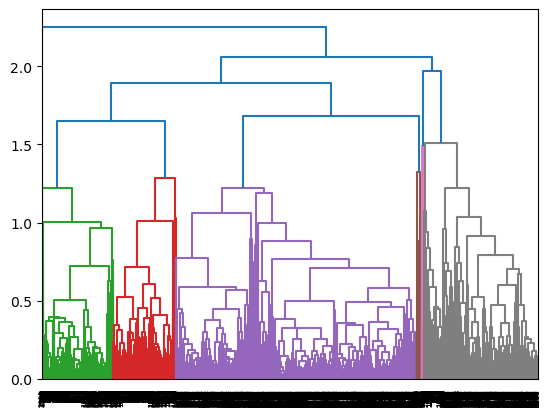

In [146]:
dn = hierarchy.dendrogram(hr)

## DBSCAN Clustering

In [148]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,HAC_Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [166]:
airline.drop('HAC_Labels', axis =1, inplace=True)

In [167]:
data =airline.iloc[:,:11]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,28143,0,1,1,1,174,1,0,0,7000
1,2,19244,0,1,1,1,215,2,0,0,6968
2,3,41354,0,1,1,1,4123,4,0,0,7034
3,4,14776,0,1,1,1,500,1,0,0,6952
4,5,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403
3995,4018,64385,0,1,1,1,981,5,0,0,1395
3996,4019,73597,0,3,1,1,25447,8,0,0,1402
3997,4020,54899,0,1,1,1,500,1,500,1,1401


### Create the model

In [168]:
from sklearn.cluster import DBSCAN

In [169]:
model = DBSCAN(eps=0.5, min_samples=12)

In [170]:
model.fit(data)

DBSCAN(min_samples=12)

In [171]:
model.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [172]:
data['Label']=model.labels_
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Label
0,1,28143,0,1,1,1,174,1,0,0,7000,-1
1,2,19244,0,1,1,1,215,2,0,0,6968,-1
2,3,41354,0,1,1,1,4123,4,0,0,7034,-1
3,4,14776,0,1,1,1,500,1,0,0,6952,-1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,-1


### Group based on labels and look at the properties of each group

In [173]:
grp = data.groupby('Label')

In [174]:
grp.agg('mean')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Label,,,,,,,,,,,
-1,2014.819455,73601.327582,144.114529,2.059515,1.014504,1.012253,17144.846212,11.6019,460.055764,1.373593,4118.55939


In [175]:
grp_award = airline.groupby('Award?')

In [176]:
grp_award.agg('mean')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Award?,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120


# Question: 2

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [69]:
crime_data = pd.read_csv('crime_data.csv')
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [70]:
crime_data.rename(columns={'Unnamed: 0':'Name'}, inplace=True)
crime_data

,Name,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [71]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [72]:
crime_data1=crime_data.drop(columns="Name")


In [77]:
features = crime_data1.iloc[:,:4]
features.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


## KMeans clustering

### scale the data

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
sd_scaler = StandardScaler()

In [81]:
Scaled_data = sd_scaler.fit_transform(features)
Scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

### Build a model

In [82]:
from sklearn.cluster import KMeans

In [83]:
k_model = KMeans(n_clusters=4,random_state=40)

In [84]:
k_model.fit(scaled_data)

KMeans(n_clusters=4, random_state=40)

In [86]:
k_model.labels_

array([1, 1, 1, ..., 2, 2, 2])

### Hyperparameter Tuning

In [88]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i, random_state=40)
    model.fit(features)
    wcss.append(model.inertia_)
wcss

[355807.8216,
 96399.02814449917,
 47964.26535714286,
 34728.629357142854,
 24417.023523809523,
 18768.000666666667,
 15463.473777777777,
 13436.825531746032,
 11258.968674603173,
 10518.078674603174]

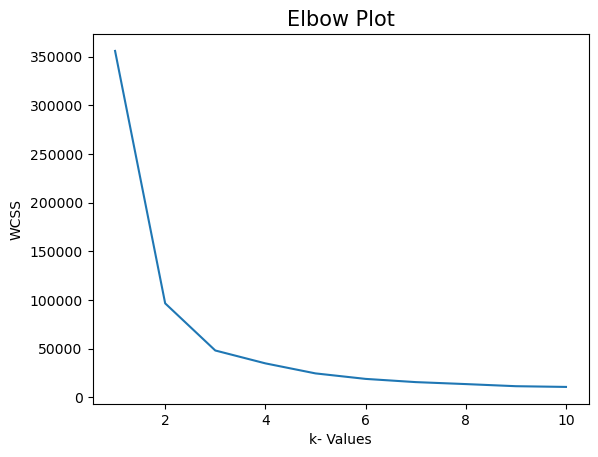

In [90]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Plot', fontsize=15)
plt.xlabel('k- Values')
plt.ylabel('WCSS')
plt.show()

### Build Final model with k=3

In [91]:
fin_model = KMeans(n_clusters=3, random_state=40)

In [92]:
fin_model.fit(Scaled_data)

KMeans(n_clusters=3, random_state=40)

In [93]:
fin_model.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [94]:
crime_data['Label'] = fin_model.labels_
crime_data.head()

,Name,Murder,Assault,UrbanPop,Rape,Label
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [96]:
grp = crime_data.groupby('Label')

In [97]:
for x,y in grp:
    print(y)
    print(70*'_')

             Name  Murder  Assault  UrbanPop  Rape  Label
3        Arkansas     8.8      190        50  19.5      0
6     Connecticut     3.3      110        77  11.1      0
7        Delaware     5.9      238        72  15.8      0
10         Hawaii     5.3       46        83  20.2      0
13        Indiana     7.2      113        65  21.0      0
15         Kansas     6.0      115        66  18.0      0
16       Kentucky     9.7      109        52  16.3      0
20  Massachusetts     4.4      149        85  16.3      0
26       Nebraska     4.3      102        62  16.5      0
29     New Jersey     7.4      159        89  18.8      0
34           Ohio     7.3      120        75  21.4      0
35       Oklahoma     6.6      151        68  20.0      0
36         Oregon     4.9      159        67  29.3      0
37   Pennsylvania     6.3      106        72  14.9      0
38   Rhode Island     3.4      174        87   8.3      0
43           Utah     3.2      120        80  22.9      0
45       Virgi

In [99]:
grp.agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Label,,,,
0,5.963158,138.052632,70.842105,18.568421
1,12.165000,255.250000,68.400000,29.165000
2,2.981818,73.636364,51.181818,11.409091


## Hierarchical Agglomerative Clustering

### scale the data

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
mn_scaler = MinMaxScaler()
scaled_mn = mn_scaler.fit_transform(features)

In [103]:
scaled_mn

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

### Build the model

In [104]:
from sklearn.cluster import AgglomerativeClustering

In [105]:
hac_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

In [106]:
hac_model.fit(scaled_mn)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [107]:
hac_model.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [108]:
crime_data['HAC_Labels'] = hac_model.labels_

In [109]:
crime_data.head()

,Name,Murder,Assault,UrbanPop,Rape,Label,HAC_Labels
0,Alabama,13.2,236,58,21.2,1,0
1,Alaska,10.0,263,48,44.5,1,0
2,Arizona,8.1,294,80,31.0,1,0
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,1,0


In [110]:
crime_data.drop('Label', axis =1, inplace=True)

In [111]:
hac_grp = crime_data.groupby('HAC_Labels')

In [112]:
for x,y in hac_grp:
    print(y)
    print(75*'_')

              Name  Murder  Assault  UrbanPop  Rape  HAC_Labels
0          Alabama    13.2      236        58  21.2           0
1           Alaska    10.0      263        48  44.5           0
2          Arizona     8.1      294        80  31.0           0
4       California     9.0      276        91  40.6           0
5         Colorado     7.9      204        78  38.7           0
8          Florida    15.4      335        80  31.9           0
9          Georgia    17.4      211        60  25.8           0
12        Illinois    10.4      249        83  24.0           0
17       Louisiana    15.4      249        66  22.2           0
19        Maryland    11.3      300        67  27.8           0
21        Michigan    12.1      255        74  35.1           0
23     Mississippi    16.1      259        44  17.1           0
24        Missouri     9.0      178        70  28.2           0
27          Nevada    12.2      252        81  46.0           0
30      New Mexico    11.4      285     

In [114]:
hac_grp.agg('mean')

,Murder,Assault,UrbanPop,Rape
HAC_Labels,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


### plot the dendrogram

In [115]:
from scipy.cluster import hierarchy

In [116]:
hr1 = hierarchy.linkage(scaled_mn, method='complete')

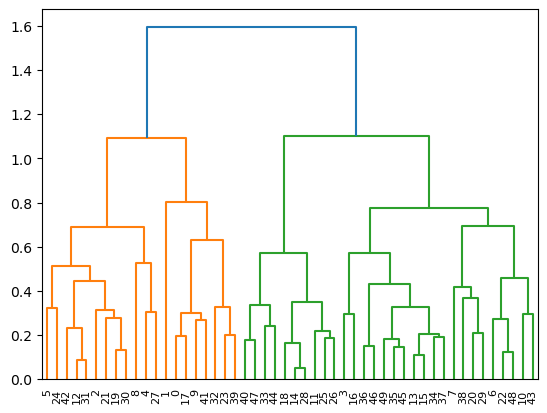

In [118]:
dn = hierarchy.dendrogram(hr1)

## DBSCAN Clustering

In [138]:
crime_data1

,Murder,Assault,UrbanPop,Rape,Label
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


### build the model

In [139]:
from sklearn.cluster import DBSCAN

In [140]:
model = DBSCAN(eps=0.5, min_samples=12)

In [141]:
model.fit(crime_data1)

DBSCAN(min_samples=12)

In [142]:
model.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [143]:
crime_data1['Label']=model.labels_
crime_data1.head()

,Murder,Assault,UrbanPop,Rape,Label
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1


### Group based on labels and look at the properties of each group

In [144]:
grp = crime_data1.groupby('Label')

In [145]:
grp.agg('mean')

,Murder,Assault,UrbanPop,Rape
Label,,,,
-1,7.788,170.76,65.54,21.232


Here the data is grouped into one